In [1]:
# Import code
from IsingModel import IsingModel

/Users/bertdepoorter/Nextcloud/Documents/School/Universiteit/Monte Carlo Methods/IsingModel.py:83: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [i, int((j+1+N)%N)]       # right neighbour


## Functionality
IsingModel has the following functions available:
- sample_energies: samples the energies for a given number of samples
- sample_spin_configurations: sample certain number of spin configurations with certain MC algorithm
- calculate_energy: calculate the energy of a given spin configuration
- visualize_energy: plot the sampled energy for a number of MC steps
- make_histogram: create a histogram that plots the distribution of the sampled energies / magnetizations
- get_magnetization: returns magnetization of a certain spin configuration
- get_exact_magnetization: returns exact magnetization for the initialized model
- plot_magnetization: returns plot like figure 3 in lecture notes, for a given number of sweeps

### uniform sampling

In [ ]:
N = 10
model = IsingModel(
    size=N, 
    J=1, 
    T=4, 
    boundary_condition='helical', 
    sampling_method='uniform'
)

In [ ]:
num_samples = 10000

energies = model.sample_energies(num_samples)
model.visualize_energy(energies)

In [ ]:
model.make_histogram(energies, normalize=True)

### Metropolis sampling

In [16]:
# initialize metropolis model
N = 10
model_metropolis = IsingModel(
    N,
    T=2,
    sampling_method='metropolis',
    boundary_condition='helical'
)

In [3]:
num_samples = 10000
energies = model_metropolis.sample_energies(num_samples)

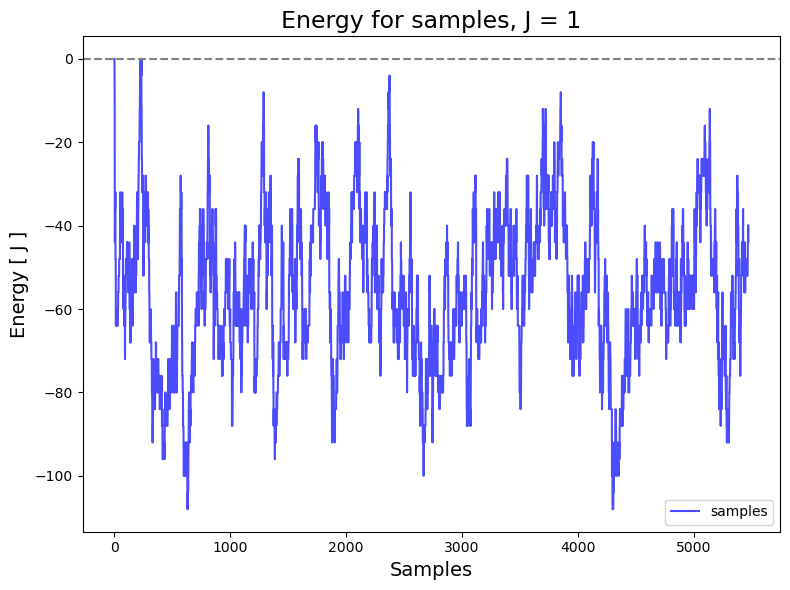

In [4]:
model_metropolis.visualize_energy(energies)

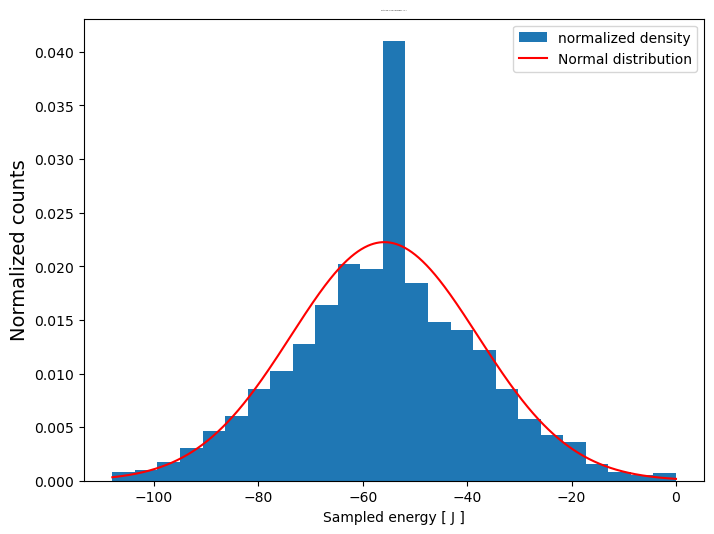

In [5]:
model_metropolis.make_histogram(energies, normalize=True)

In [ ]:
sweeps = 100
model_metropolis.plot_magnetization(sweeps)

In [15]:
import numpy as np
J=1
T=2
M = (1-np.sinh(2*J/T)**(-4))**(1/8)
print(M)

0.911319377877496
